In [1]:
# Import our dependencies
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn as skl
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Import the dataset
world_pop = pd.read_csv('Resources/pop_worldometer_data.csv')
world_pop.head(10)

,Country (or dependency),Population (2020),Yearly Change %,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share %
0,China,1439323776,0.39,5540090,153,9388211,-348399.0,1.7,38.0,61.0,18.47
1,India,1380004385,0.99,13586631,464,2973190,-532687.0,2.2,28.0,35.0,17.70
2,United States,331002651,0.59,1937734,36,9147420,954806.0,1.8,38.0,83.0,4.25
3,Indonesia,273523615,1.07,2898047,151,1811570,-98955.0,2.3,30.0,56.0,3.51
4,Pakistan,220892340,2.00,4327022,287,770880,-233379.0,3.6,23.0,35.0,2.83
5,Brazil,212559417,0.72,1509890,25,8358140,21200.0,1.7,33.0,88.0,2.73
6,Nigeria,206139589,2.58,5175990,226,910770,-60000.0,5.4,18.0,52.0,2.64
7,Bangladesh,164689383,1.01,1643222,1265,130170,-369501.0,2.1,28.0,39.0,2.11
8,Russia,145934462,0.04,62206,9,16376870,182456.0,1.8,40.0,74.0,1.87
9,Mexico,128932753,1.06,1357224,66,1943950,-60000.0,2.1,29.0,84.0,1.65


In [3]:
world_pop = world_pop.drop(["Country (or dependency)"], axis=1)

In [4]:
world_pop.head()

,Population (2020),Yearly Change %,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share %
0,1439323776,0.39,5540090,153,9388211,-348399.0,1.7,38.0,61.0,18.47
1,1380004385,0.99,13586631,464,2973190,-532687.0,2.2,28.0,35.0,17.70
2,331002651,0.59,1937734,36,9147420,954806.0,1.8,38.0,83.0,4.25
3,273523615,1.07,2898047,151,1811570,-98955.0,2.3,30.0,56.0,3.51
4,220892340,2.00,4327022,287,770880,-233379.0,3.6,23.0,35.0,2.83


In [5]:
world_pop.dtypes

Population (2020)      int64
Yearly Change %      float64
Net Change             int64
Density (P/Km²)        int64
Land Area (Km²)        int64
Migrants (net)       float64
Fert. Rate           float64
Med. Age             float64
Urban Pop %          float64
World Share %        float64
dtype: object

In [6]:
world_pop = world_pop.dropna()

In [7]:
# Remove 'Net Change' target from features data
y = world_pop["Net Change"]
X = world_pop.drop(['Net Change'], axis=1)

In [8]:
y.describe()

count    1.720000e+02
mean     4.799579e+05
std      1.293545e+06
min     -8.500000e+01
25%      1.155925e+04
50%      9.764000e+04
75%      4.482515e+05
max      1.358663e+07
Name: Net Change, dtype: float64

In [9]:
X.head()

,Population (2020),Yearly Change %,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share %
0,1439323776,0.39,153,9388211,-348399.0,1.7,38.0,61.0,18.47
1,1380004385,0.99,464,2973190,-532687.0,2.2,28.0,35.0,17.70
2,331002651,0.59,36,9147420,954806.0,1.8,38.0,83.0,4.25
3,273523615,1.07,151,1811570,-98955.0,2.3,30.0,56.0,3.51
4,220892340,2.00,287,770880,-233379.0,3.6,23.0,35.0,2.83


In [10]:
X.shape

(172, 9)

In [11]:
y.shape


(172,)

In [12]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y,)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Use multilinear regression analyses

In [13]:
# Define linear regression model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lin_classifier = LinearRegression()

# Train the model
lin_classifier.fit(X_train_scaled,y_train)

# Evaluate the model
y_pred = lin_classifier.predict(X_test)
print(f" Mean Squared Error: {mean_squared_error(y_test,y_pred):.3f}")

 Mean Squared Error: 22441940744383660848893518675968.000


In [14]:
# Define basic neural network model
from keras.models import Sequential
nn_model = Sequential()
nn_model.add(tf.keras.layers.Dense(9, input_dim=9, kernel_initializer='normal', activation='relu'))
nn_model.add(tf.keras.layers.Dense(1, kernel_initializer='normal'))
# Compile model
nn_model.compile(loss='mean_squared_error', optimizer='adam')
y_pred = nn_model.predict(X_test)
print(f" Mean Squared Error: {mean_squared_error(y_test,y_pred):.3f}")

 Mean Squared Error: 2333252794923.929


In [15]:
 # Try RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier    

# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Mean Squared Error: {mean_squared_error(y_test,y_pred):.3f}")

 Mean Squared Error: 291966258806.070


In [16]:
 # Try RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier    

# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=1000, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Mean Squared Error: {mean_squared_error(y_test,y_pred):.3f}")

 Mean Squared Error: 239648366327.512


In [18]:
(len(X))

172

172
172
LR: -4259.937414 (11196.677646)


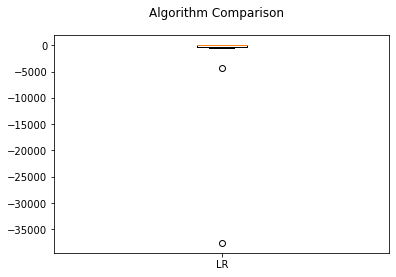

In [19]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
# url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = pandas.read_csv(url, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
#models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=200)))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
models.append(('LR', LinearRegression()))
# evaluate each model in turn
results = []
names = []
scoring = 'r2'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    print(len(X))
    print(len(y))
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [20]:
len(X)

172